In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### FROM SCRATCH

In [2]:
df = pd.read_csv('Train-Test-Data-LR2/Train.csv')
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [3]:
df.shape

(1600, 6)

In [4]:
x_train = df.iloc[: , :5].values
y_train = df.iloc[: , 5].values

print(x_train.shape , y_train.shape)

(1600, 5) (1600,)


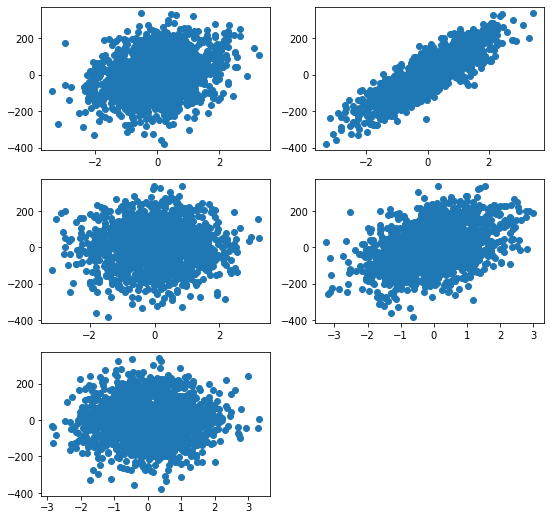

In [5]:
plt.figure(figsize = (9, 9))

for i in range(x_train.shape[1]):
    plt.subplot(3 , 2, i+1)
    plt.scatter(x_train[:, i] , y_train)

In [6]:
from mpl_toolkits import mplot3d
%matplotlib notebook

<IPython.core.display.Javascript object>


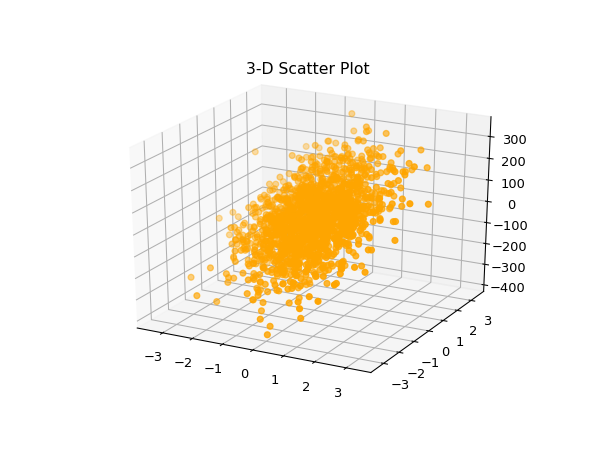

In [12]:
fig = plt.figure()

axes = fig.gca(projection = '3d')
axes.scatter3D(x_train[: , 0] , x_train[: , 1] , y_train , color='orange')

plt.title('3-D Scatter Plot')
plt.show()

In [13]:
ones = np.ones((x_train.shape[0],1))
x_train = np.hstack((ones , x_train))

print(x_train.shape)

(1600, 6)


In [14]:
def hypothesis(x , theta):
    y_ = np.dot(x , theta)
    return y_

def error(x , y , theta):
    e = 0.0
    y_ = hypothesis(x , theta)
    e = np.sum((y_ - y)**2)
    return e/x.shape[0]

def gradient(x , y , theta):
    y_ = hypothesis(x , theta)
    grad = np.dot(x.T , (y_ - y))
    return grad/x.shape[0]

def gradient_descent(x , y , max_iterations = 250 , learning_rate = 0.1):
    theta = np.zeros((x.shape[1],))
    error_list = []
    
    for i in range(max_iterations):
        
        grad = gradient(x , y , theta)
        theta = theta - learning_rate*grad
        
        e = error(x , y , theta)
        error_list.append(e)
        
    return theta , error_list

In [15]:
import time
start = time.time()
theta , error_list = gradient_descent(x_train , y_train)
end = time.time()

print("Time Taken is: ", end-start)

Time Taken is:  0.03677058219909668


In [16]:
theta

array([ 4.99096673, 29.68187118, 92.66247759,  8.28062089, 44.76773522,
        2.51916121])

In [22]:
%matplotlib inline

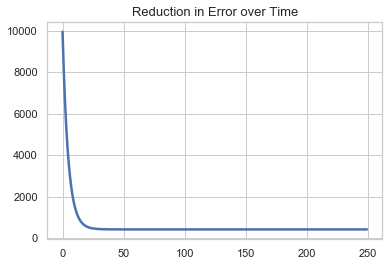

In [23]:
with sns.axes_style(style = 'whitegrid'):
    plt.plot(error_list , linewidth = 2.5)
plt.title('Reduction in Error over Time' , size = 13)
plt.show()

In [24]:
def r2_score(y , y_):
    num = np.sum((y - y_)**2)
    denom = np.sum((y - y.mean())**2)
    return 1 - (num/denom)

In [25]:
y_ = hypothesis(x_train , theta)

In [26]:
r2_score(y_train , y_)*100

96.60939669975616

In [27]:
x_test = pd.read_csv('Train-Test-Data-LR2/Test.csv')
x_test.head(3)

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201


In [28]:
x_test = x_test.values
x_test.shape

(400, 5)

In [29]:
ones = np.ones((x_test.shape[0], 1))
x_test = np.hstack((ones , x_test))
print(x_test.shape)

(400, 6)


In [30]:
y_test = hypothesis(x_test , theta)

In [31]:
df = pd.DataFrame(y_test , columns = ['target'])
df.head(3)

,target
0,114.583689
1,118.012815
2,-21.739852


In [32]:
df.shape

(400, 1)

In [33]:
df.to_csv('y_predictions.csv' , index_label = ['Id'])

#### FROM SK-LEARN

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [35]:
lr.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
print("Intercept: " , lr.intercept_)
print("Coefficients: " , lr.coef_)

Intercept:  4.990966735574956
Coefficients:  [ 0.         29.68187118 92.66247759  8.28062089 44.76773522  2.51916121]


In [37]:
y_test_sk = lr.predict(x_test)

In [39]:
df = pd.DataFrame(y_test_sk , columns = ['target'])
df.head(3)

,target
0,114.583689
1,118.012815
2,-21.739852


In [40]:
df.to_csv('y_predictions_sklearn.csv' , index_label = ['Id'])